In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import tree

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.metrics import precision_score,recall_score

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [6]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:70% !important;}</style>"
HTML(style)

In [7]:
titanic_date=pd.read_csv("train.csv")

In [8]:
titanic_date.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_date.isnull().sum() # подсчет None значенией в датафрейме

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X= titanic_date.drop(['PassengerId','Survived','Name','Ticket', 'Cabin'], axis=1) #создание нового ДФ, удаление колонок
y= titanic_date.Survived

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
X=pd.get_dummies(X) # конвертация строки в фиктивную переменную выраженную 0\1

In [13]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
X.Age.median()

28.0

In [15]:
X=X.fillna({'Age' : X.Age.median()}) # замена None на значение , в колонке Age

In [16]:
X.isnull().sum() # проверка None значений

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
clf=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=100) 

In [18]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
clf.fit(X,y) # тренировка модели

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import os
path=r"c:\\Program Files (x86)\\Graphviz2.38\\bin\\"

In [21]:
os.environ["PATH"] += os.pathsep +path

In [22]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died','Survived'],
                                   filled = True))

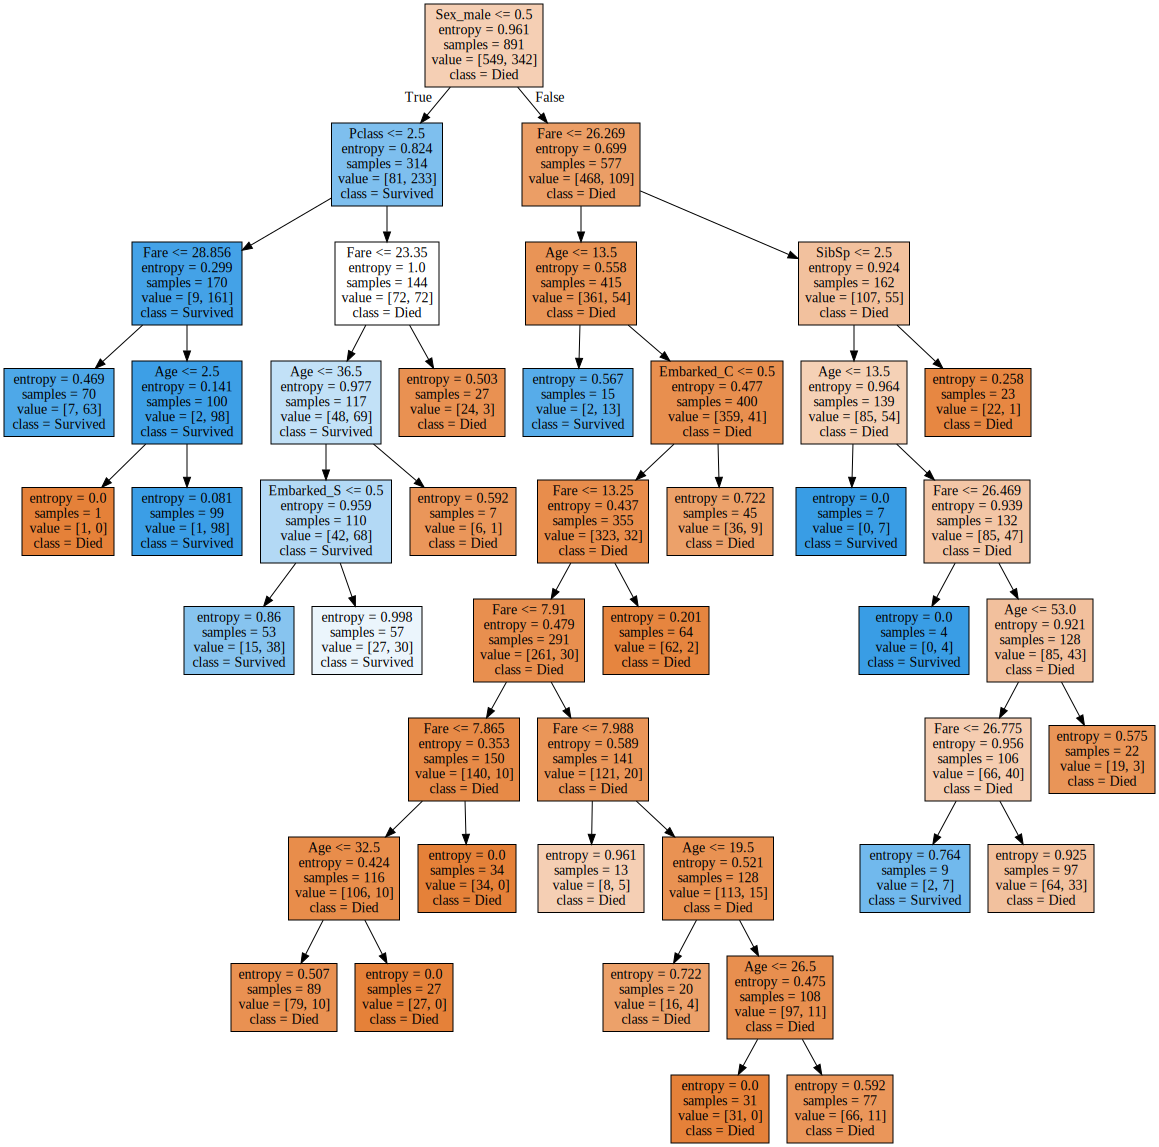

In [23]:
display(SVG(graph.pipe(format='svg')))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [26]:
clf.score(X,y)

0.8473625140291807

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
clf.score(X_train,y_train)

0.8053691275167785

In [29]:
clf.score(X_test,y_test)

0.7762711864406779

In [30]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) #изменение глубины дерева до 3х веток

In [31]:
max_depth_value=range(1,100)

In [32]:
max_depth_value

range(1, 100)

In [33]:
scores_data=pd.DataFrame()

In [34]:
for max_depth in max_depth_value:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth) 
    clf.fit(X_train, y_train)
    train_score=clf.score(X_train,y_train)
    test_score= clf.score(X_test,y_test)
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data=pd.DataFrame({'max_depth': [max_depth], 'train_score' : train_score, 'test_score' : test_score, 'cross_val_score' : mean_cross_val_score})
    scores_data=scores_data.append(temp_score_data)

In [35]:
scores_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.798622
0,6,0.867450,0.766102,0.795388
0,7,0.882550,0.776271,0.796984
0,8,0.907718,0.796610,0.798622
0,9,0.917785,0.803390,0.790190
0,10,0.926174,0.800000,0.801955


In [36]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'], value_vars=['train_score','test_score', 'cross_val_score'],\
                         var_name='set_type', value_name='scores')

In [37]:
scores_data_long.head()

,max_depth,set_type,scores
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [38]:
scores_data_long.query("set_type=='cross_val_score'").head(10)

,max_depth,set_type,scores
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.798622
203,6,cross_val_score,0.795388
204,7,cross_val_score,0.796984
205,8,cross_val_score,0.798622
206,9,cross_val_score,0.790190
207,10,cross_val_score,0.801955


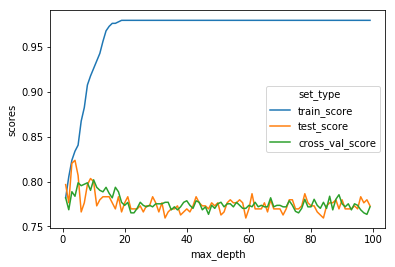

In [39]:
sns.lineplot(data=scores_data_long, x='max_depth', y='scores', hue='set_type')

In [40]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7969415562835304

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params={'criterion' : ['gini', 'entropy'], 
        'max_depth' : range(1,10),
        'min_samples_split' : range(2,5), 
        'min_samples_leaf' : range(32,52)} # необходимые параметры для подборщика

In [44]:
grid_search_cv_clf=GridSearchCV(clf, params,cv=5) #подборщик оптимальных параметров

In [45]:
grid_search_cv_clf.fit(X_train,y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 5), 'min_samples_leaf': range(32, 52)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid_search_cv_clf.best_params_ #лучшие параметры

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 2}

In [47]:
best_clf=grid_search_cv_clf.best_estimator_ # классификатор с лучшими параметрами

In [48]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died','Survived'],
                                   filled = True))

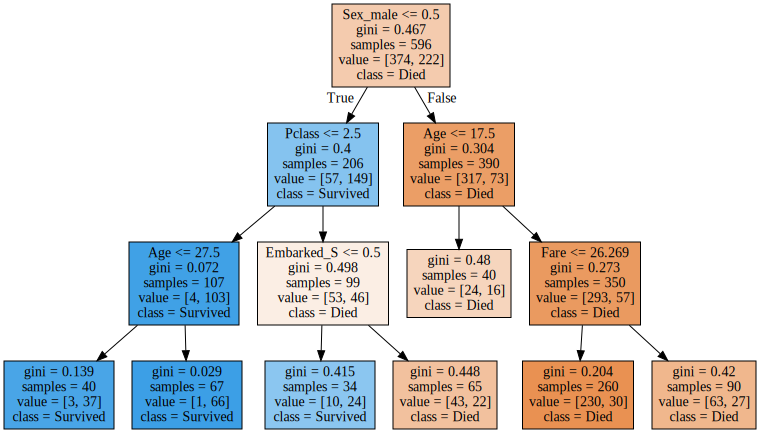

In [49]:
display(SVG(graph.pipe(format='svg')))

In [50]:
best_clf.score(X_test, y_test)

0.8

In [51]:
y_pred=best_clf.predict(X_test)

In [52]:
precision_score(y_test,y_pred)

0.8588235294117647

In [53]:
recall_score(y_test,y_pred)

0.6083333333333333

In [54]:
y_pred_prob=best_clf.predict_proba(X_test)

In [76]:
y_pred_prob

array([[0.88461538, 0.11538462],
       [0.88461538, 0.11538462],
       [0.88461538, 0.11538462],
       [0.075     , 0.925     ],
       [0.29411765, 0.70588235],
       [0.075     , 0.925     ],
       [0.29411765, 0.70588235],
       [0.6       , 0.4       ],
       [0.29411765, 0.70588235],
       [0.075     , 0.925     ],
       [0.7       , 0.3       ],
       [0.88461538, 0.11538462],
       [0.66153846, 0.33846154],
       [0.88461538, 0.11538462],
       [0.88461538, 0.11538462],
       [0.075     , 0.925     ],
       [0.7       , 0.3       ],
       [0.29411765, 0.70588235],
       [0.88461538, 0.11538462],
       [0.7       , 0.3       ],
       [0.88461538, 0.11538462],
       [0.7       , 0.3       ],
       [0.66153846, 0.33846154],
       [0.88461538, 0.11538462],
       [0.88461538, 0.11538462],
       [0.6       , 0.4       ],
       [0.7       , 0.3       ],
       [0.88461538, 0.11538462],
       [0.6       , 0.4       ],
       [0.66153846, 0.33846154],
       [0.

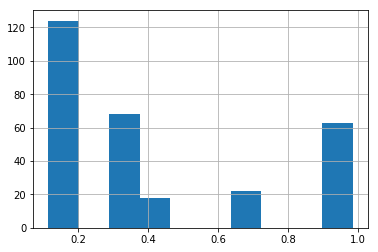

In [56]:
pd.Series(y_pred_prob[:,1]).hist()

In [57]:
y_pred=np.where(y_pred_prob[:,1]>0.9,1,0) #перекодировать( если больше 0.7 - тогда 1, иначе-0)

In [58]:
precision_score(y_test,y_pred)

0.9206349206349206

In [59]:
pd.Series(y_pred_prob[:,1]).unique()

array([0.11538462, 0.925     , 0.70588235, 0.4       , 0.3       ,
       0.33846154, 0.98507463])

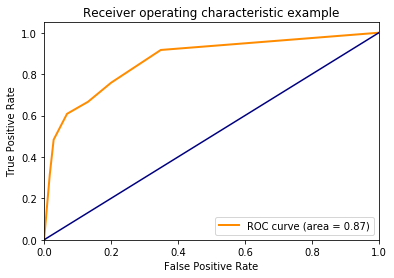

In [60]:
from sklearn.metrics import roc_curve, auc                                  # ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf_rf=RandomForestClassifier()

In [63]:
params= {'n_estimators' :[10,20,30], 'max_depth' : [2,5,7,10]}

In [64]:
grid_search=GridSearchCV(clf_rf, params, cv=5)


In [65]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [67]:
best_clf=grid_search.best_estimator_

In [68]:
best_clf.score(X_test,y_test)

0.8135593220338984

In [69]:
features_importances=best_clf.feature_importances_

In [70]:
features_importances_df=pd.DataFrame({'features' : list(X),
                                    'features_importances' : features_importances})

In [71]:
features_importances_df

,features,features_importances
0,Pclass,0.118010
1,Age,0.154753
2,SibSp,0.059687
3,Parch,0.040245
4,Fare,0.167061
5,Sex_female,0.144541
6,Sex_male,0.260556
7,Embarked_C,0.023944
8,Embarked_Q,0.008249
9,Embarked_S,0.022955


In [72]:
features_importances_df.sort_values('features_importances',ascending=False)

,features,features_importances
6,Sex_male,0.260556
4,Fare,0.167061
1,Age,0.154753
5,Sex_female,0.144541
0,Pclass,0.118010
2,SibSp,0.059687
3,Parch,0.040245
7,Embarked_C,0.023944
9,Embarked_S,0.022955
8,Embarked_Q,0.008249


In [73]:
#https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

In [77]:
heart=pd.read_csv('heart.csv')

In [78]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
X=heart.drop('target', axis=1)

In [80]:
y=heart.target

In [81]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)


In [82]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
features_importances_heart=rf.feature_importances_

In [84]:
features_importances_heart_df=pd.DataFrame({'features' : list(X),
                                    'features_importances' : features_importances_heart})

In [85]:
features_importances_heart_df.sort_values('features_importances', ascending=False)

,features,features_importances
12,thal,0.198525
2,cp,0.139983
7,thalach,0.129550
9,oldpeak,0.116645
11,ca,0.077048
10,slope,0.069208
4,chol,0.056887
3,trestbps,0.053569
8,exang,0.048079
0,age,0.043441


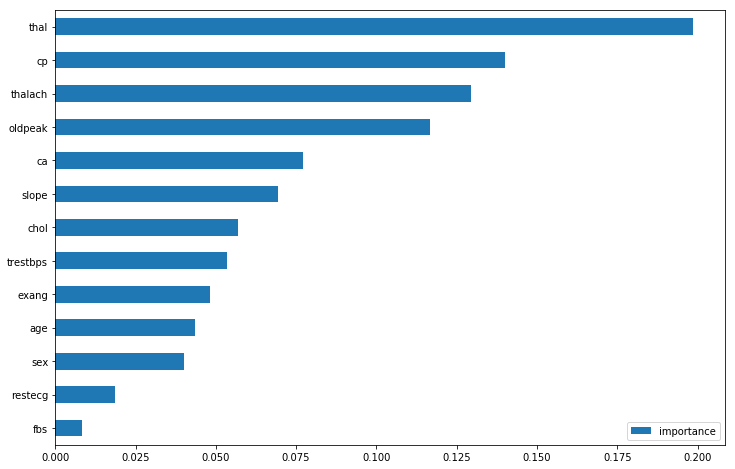

In [86]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
